## **1. 데이터 분석 목표**

*   회사의 매출 관점에서 카테고리별(대카테고리, 서브 카테고리) 매출을 분석하고 향후 성장 방안을 찾는 것





## **2. 데이터 선정**

*   2014년 3월 현재 소속되어 있는 온라인 커머스 기업의 데이터들을 수집
*   매출을 기준으로 카테고리별 성장 방안을 모색하기 위해 2011년부터 2014년 현재까지 고객 정보와 거래 내역, 카테고리별 내역들을 활용



## **3. 데이터 분석방법**

 1) 데이터 전처리 및 탐색 실행


In [1]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [14]:
#데이터 분석을 위해 고객 인적정보, 거래내역, 카테고리 데이터 불러오기
df = pd.read_csv('merge_trans_cust_prod.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            22933 non-null  int64  
 1   dob                22933 non-null  object 
 2   age                22933 non-null  int64  
 3   gender             22933 non-null  object 
 4   city_code          22933 non-null  float64
 5   order_status       22933 non-null  object 
 6   confirmed_yn       22933 non-null  float64
 7   transaction_id     22933 non-null  int64  
 8   tran_date          22933 non-null  object 
 9   prod_cat_code      22933 non-null  int64  
 10  prod_sub_cat_code  22933 non-null  int64  
 11  prod_cat           22933 non-null  object 
 12  prod_subcat        22933 non-null  object 
 13  qty                22933 non-null  int64  
 14  rate               22933 non-null  int64  
 15  tax                22933 non-null  float64
 16  total_amt          229

In [15]:
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-01-04,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-08-05,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,29,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


In [16]:
# 통합된 데이터 결측치 확인 및 처리
# 통합된 데이터에는 결측치가 존재하지 않아 그래로 데이터 전처리 과정 진행
df.isnull().sum()

cust_id              0
dob                  0
age                  0
gender               0
city_code            0
order_status         0
confirmed_yn         0
transaction_id       0
tran_date            0
prod_cat_code        0
prod_sub_cat_code    0
prod_cat             0
prod_subcat          0
qty                  0
rate                 0
tax                  0
total_amt            0
store_type           0
dtype: int64

In [17]:
# 데이터 안에 날짜가 있으므로 날짜 데이터의 형식 확인
# 날짜 데이터인 dob, tran_date가 object 타입이므로 데이터 타입 변환 필요
df.dtypes

cust_id                int64
dob                   object
age                    int64
gender                object
city_code            float64
order_status          object
confirmed_yn         float64
transaction_id         int64
tran_date             object
prod_cat_code          int64
prod_sub_cat_code      int64
prod_cat              object
prod_subcat           object
qty                    int64
rate                   int64
tax                  float64
total_amt            float64
store_type            object
dtype: object

In [18]:
# 날짜 데이터 전처리에 앞서 데이터 형식을 확인.
# dob와 tran_date 변수에서는 dd-mm-yyyy가 아닌 yyyy-mm-dd 형식임이 확인가능함
df["dob"].unique()

array(['1975-09-17', '1970-04-29', '1974-01-04', ..., '1991-06-06',
       '1990-11-20', '1984-02-04'], dtype=object)

In [19]:
df["tran_date"].unique()

array(['2011-08-02', '2013-05-11', '2013-10-25', ..., '2014-02-21',
       '2014-02-24', '2014-02-28'], dtype=object)

In [21]:
# 하지만 데이터 타입 확인했을 때 날짜 형태인 dob, tran_date가 object였음
# to_datetime 함수를 이용하여 데이터 타입을 변환해줌
df["dob"] = pd.to_datetime(df["dob"])
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-01-04,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-08-05,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,29,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


In [22]:
df["tran_date"] = pd.to_datetime(df["tran_date"])
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-01-04,39,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-08-05,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,29,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


In [23]:
# 날짜 형태 dob, tran_date 변수가 날짜 형태로 바뀌었음을 확인가능
df.dtypes

cust_id                       int64
dob                  datetime64[ns]
age                           int64
gender                       object
city_code                   float64
order_status                 object
confirmed_yn                float64
transaction_id                int64
tran_date            datetime64[ns]
prod_cat_code                 int64
prod_sub_cat_code             int64
prod_cat                     object
prod_subcat                  object
qty                           int64
rate                          int64
tax                         float64
total_amt                   float64
store_type                   object
dtype: object

In [24]:
# 데이터의 열과 행을 확인하였을 때 22,933행과 18열로 이루어져 있는 것을 알수 있음
df.shape

(22933, 18)

In [25]:
# 중복된 행을 확인하였을 때 중복되는 행은 없는 것으로 나타남.
duplicated_df = df[df.duplicated()]
print("number of duplicate rows:", duplicated_df.shape)

number of duplicate rows: (0, 18)


In [26]:
# 결측치를 확인하였을 때 결측치가 없었음.
print(df.isnull().sum())

cust_id              0
dob                  0
age                  0
gender               0
city_code            0
order_status         0
confirmed_yn         0
transaction_id       0
tran_date            0
prod_cat_code        0
prod_sub_cat_code    0
prod_cat             0
prod_subcat          0
qty                  0
rate                 0
tax                  0
total_amt            0
store_type           0
dtype: int64


In [27]:
df['dob'].head(5)

0   1975-09-17
1   1970-04-29
2   1974-01-04
3   1986-08-05
4   1984-02-29
Name: dob, dtype: datetime64[ns]

In [28]:
df['tran_date'].head(5)

0   2011-08-02
1   2013-05-11
2   2013-10-25
3   2011-03-28
4   2013-08-01
Name: tran_date, dtype: datetime64[ns]

In [29]:
# 위에서 확인 결과 tran_date과 dob가 날짜 형식인 것을 알 수 있었음
# to_datetime 함수를 이용해 tran_date과 dob를 날짜 형식의 데이터로 타입 변환
df["tran_date"] = pd.to_datetime(df["tran_date"])
df["dob"] = pd.to_datetime(df["dob"])
df.dtypes

cust_id                       int64
dob                  datetime64[ns]
age                           int64
gender                       object
city_code                   float64
order_status                 object
confirmed_yn                float64
transaction_id                int64
tran_date            datetime64[ns]
prod_cat_code                 int64
prod_sub_cat_code             int64
prod_cat                     object
prod_subcat                  object
qty                           int64
rate                          int64
tax                         float64
total_amt                   float64
store_type                   object
dtype: object

In [30]:
## iloc 함수를 이용하여 데이터 중간 날짜 형태 확인
df.iloc[150:161]

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
150,272456,1980-04-24,34,M,10.0,Ordered,1.0,629286523,2014-01-17,5,6,Books,DIY,4,714,299.880,3155.880,TeleShop
151,269439,1975-09-26,38,F,9.0,Ordered,1.0,633971438,2013-08-09,3,8,Electronics,Personal Appliances,1,499,52.395,551.395,e-Shop
152,267720,1978-05-02,34,F,10.0,Ordered,1.0,636104104,2012-07-26,5,6,Books,DIY,1,733,76.965,809.965,e-Shop
153,274017,1982-04-01,31,F,10.0,Ordered,1.0,639298867,2013-06-04,3,8,Electronics,Personal Appliances,1,1070,112.350,1182.350,MBR
154,275244,1979-01-02,33,M,8.0,Ordered,1.0,641536043,2012-09-01,1,4,Clothing,Mens,3,351,110.565,1163.565,Flagship store
155,269125,1982-06-12,29,F,4.0,Ordered,1.0,643942673,2011-12-27,4,4,Bags,Women,5,1471,772.275,8127.275,MBR
156,268056,1988-03-26,23,M,10.0,Ordered,1.0,644338327,2011-09-20,5,7,Books,Fiction,3,349,109.935,1156.935,e-Shop
157,268679,1982-04-29,30,F,5.0,Ordered,1.0,649430627,2012-02-09,4,1,Bags,Mens,3,114,35.910,377.910,e-Shop
158,271108,1973-04-28,39,M,10.0,Ordered,1.0,650789826,2012-01-03,2,3,Footwear,Women,1,1088,114.240,1202.240,MBR
159,269213,1976-08-20,36,M,3.0,Ordered,1.0,652555256,2012-07-17,6,10,Home and kitchen,Kitchen,4,1238,519.960,5471.960,e-Shop


In [31]:
# 각 컬럼의 통계치 확인
df.describe()

,cust_id,age,city_code,confirmed_yn,transaction_id,prod_cat_code,prod_sub_cat_code,qty,rate,tax,total_amt
count,22933.000000,22933.000000,22933.000000,22933.000000,2.293300e+04,22933.000000,22933.000000,22933.000000,22933.000000,22933.000000,22933.000000
mean,271022.206907,31.079144,5.479789,0.820608,5.006082e+10,3.763485,6.150089,2.460821,643.887062,248.627771,2132.443050
std,2431.412708,6.680791,2.863621,0.383689,2.898270e+10,1.676985,3.725407,2.237511,614.476851,187.095000,2485.093721
min,266783.000000,19.000000,1.000000,0.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268936.000000,25.000000,3.000000,1.000000,2.488360e+10,2.000000,3.000000,1.000000,318.000000,98.280000,777.920000
50%,270980.000000,31.000000,5.000000,1.000000,5.008910e+10,4.000000,5.000000,3.000000,715.000000,199.080000,1773.525000
75%,273115.000000,37.000000,8.000000,1.000000,7.531500e+10,5.000000,10.000000,4.000000,1111.000000,365.400000,3584.620000
max,275265.000000,44.000000,10.000000,1.000000,9.998755e+10,6.000000,12.000000,5.000000,1500.000000,787.500000,8287.500000


3. 데이터 분석방법

    2)   대카테고리, 서브카테고리를 기준으로 성별, 거주지별, 연령별, 판매금액별, 세금별, 거래금액별, 거래날짜별(연도, 월, 요일),판매채널타입별로 나누어 분석


In [32]:
from datetime import timedelta
import time

In [33]:
df.insert(loc=3, column ='year', value=df.tran_date.dt.year)
df.insert(loc=4, column ='month', value=df.tran_date.dt.month)

df.head()

,cust_id,dob,age,year,month,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,2011,8,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,2013,5,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-01-04,39,2013,10,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-08-05,25,2011,3,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,29,2013,8,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


In [34]:
df.insert(loc=5, column='day', value=df['tran_date'].dt.day_name())
df.head()

,cust_id,dob,age,year,month,day,gender,city_code,order_status,confirmed_yn,...,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,2011,8,Tuesday,M,10.0,Ordered,1.0,...,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,43,2013,5,Saturday,M,7.0,Ordered,1.0,...,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-01-04,39,2013,10,Friday,F,7.0,Ordered,1.0,...,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-08-05,25,2011,3,Monday,F,5.0,Ordered,1.0,...,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,29,2013,8,Thursday,M,2.0,Ordered,1.0,...,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


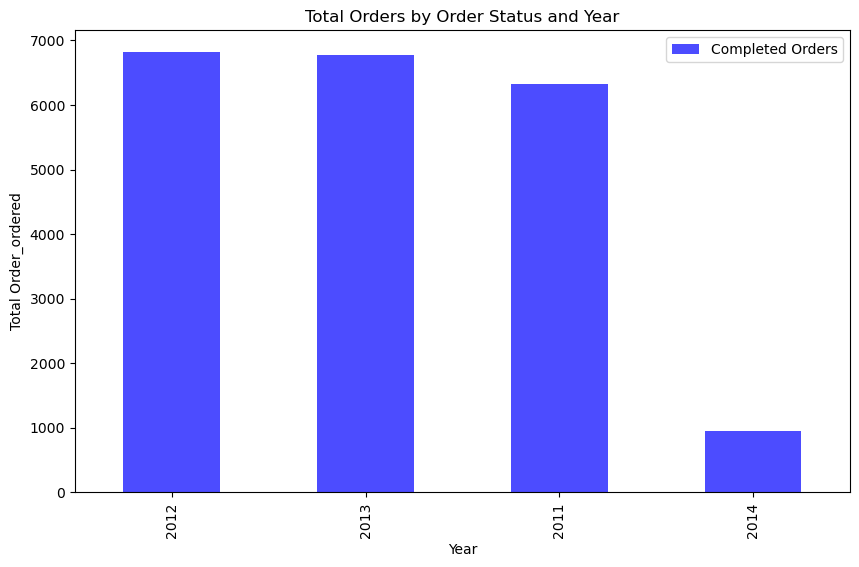

In [35]:
completed_orders = df[df['order_status'] == 'Ordered']

completed_order_counts = completed_orders["year"].value_counts()

plt.figure(figsize=(10, 6))
completed_order_counts.plot(kind="bar", color='blue', alpha=0.7, label='Completed Orders')

plt.xlabel("Year")
plt.ylabel("Total Order_ordered")
plt.title("Total Orders by Order Status and Year")
plt.legend()

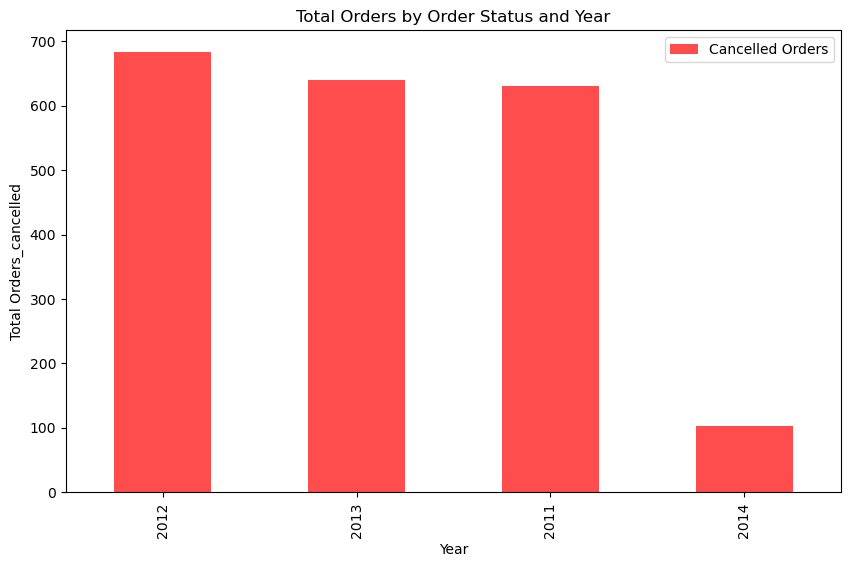

In [36]:
cancelled_orders = df[df['order_status'] == 'Canceled']

cancelled_order_counts = cancelled_orders["year"].value_counts()

plt.figure(figsize=(10, 6))
cancelled_order_counts.plot(kind="bar", color='red', alpha=0.7, label='Cancelled Orders')

plt.xlabel("Year")
plt.ylabel("Total Orders_cancelled")
plt.title("Total Orders by Order Status and Year")
plt.legend()

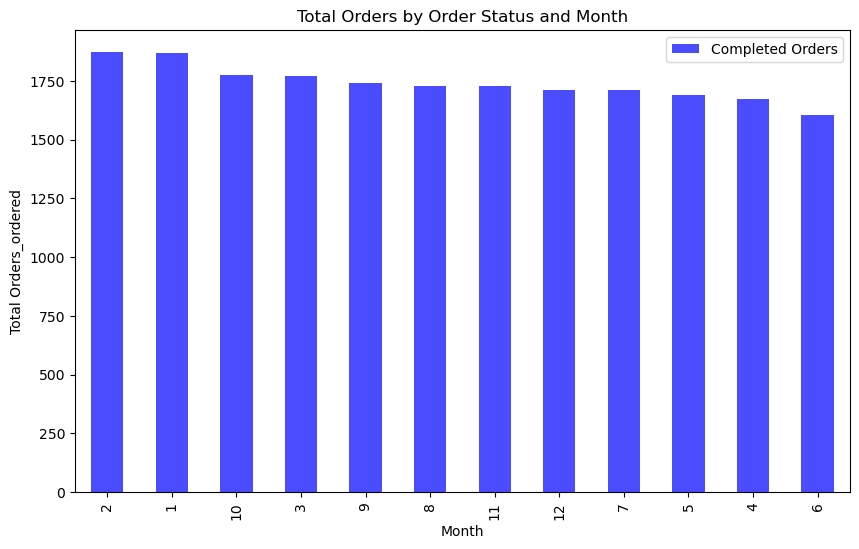

In [37]:
completed_orders_mo = df[df['order_status'] == 'Ordered']

completed_order_counts_mo = completed_orders_mo["month"].value_counts()

plt.figure(figsize=(10, 6))
completed_order_counts_mo.plot(kind="bar", color='blue', alpha=0.7, label='Completed Orders')

plt.xlabel("Month")
plt.ylabel("Total Orders_ordered")
plt.title("Total Orders by Order Status and Month")
plt.legend()

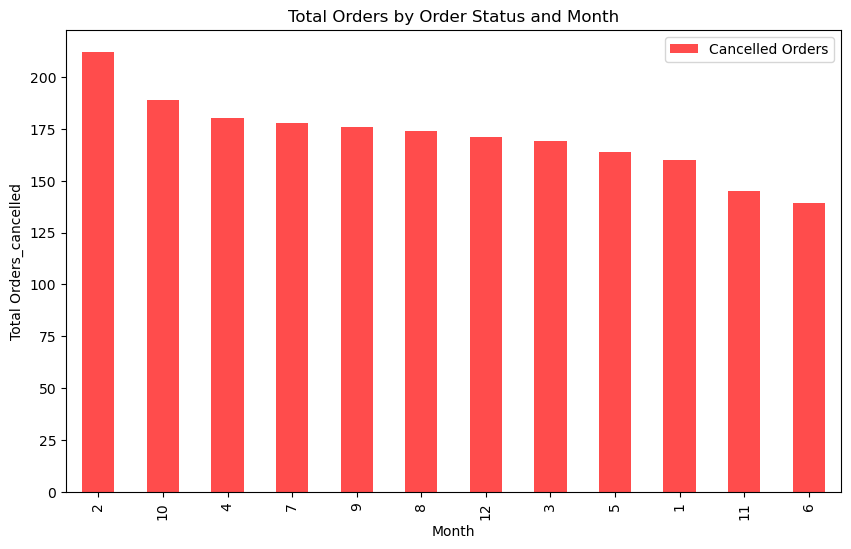

In [38]:
cancelled_orders_mc = df[df['order_status'] == 'Canceled']

cancelled_order_counts_mc = cancelled_orders_mc["month"].value_counts()

plt.figure(figsize=(10, 6))
cancelled_order_counts_mc.plot(kind="bar", color='red', alpha=0.7, label='Cancelled Orders')

plt.xlabel("Month")
plt.ylabel("Total Orders_cancelled")
plt.title("Total Orders by Order Status and Month")
plt.legend()

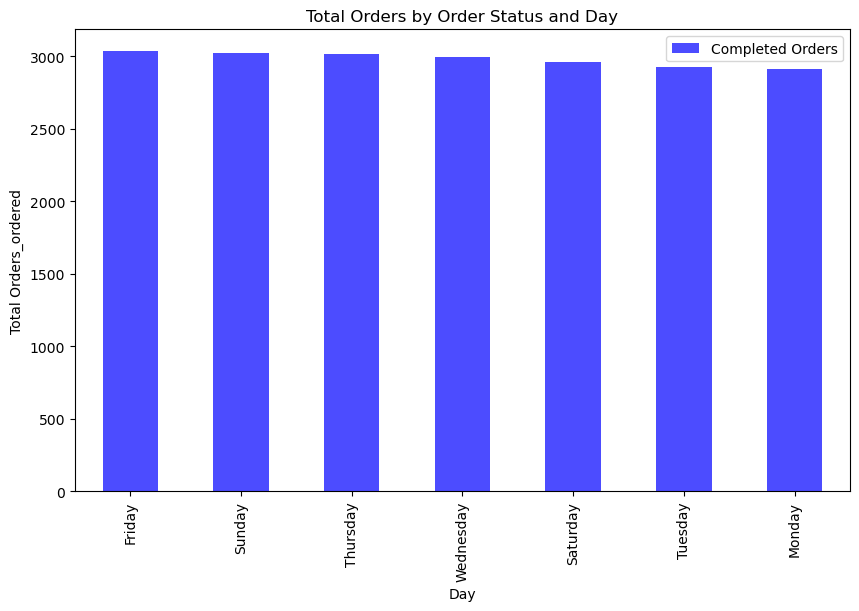

In [39]:
completed_orders_do = df[df['order_status'] == 'Ordered']

completed_order_counts_do = completed_orders_do["day"].value_counts()

plt.figure(figsize=(10, 6))
completed_order_counts_do.plot(kind="bar", color='blue', alpha=0.7, label='Completed Orders')

plt.xlabel("Day")
plt.ylabel("Total Orders_ordered")
plt.title("Total Orders by Order Status and Day")
plt.legend()

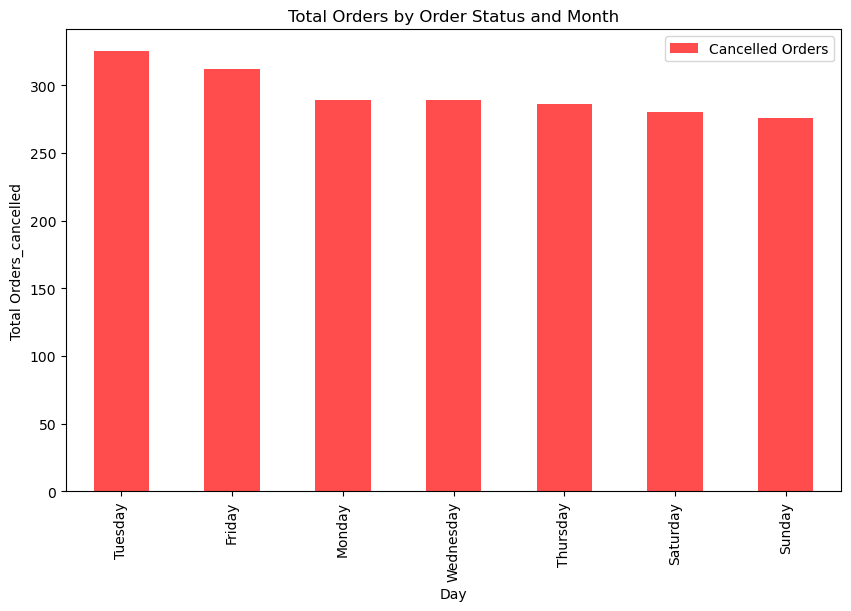

In [40]:
cancelled_orders_dc = df[df['order_status'] == 'Canceled']

cancelled_order_counts_dc = cancelled_orders_dc["day"].value_counts()

plt.figure(figsize=(10, 6))
cancelled_order_counts_dc.plot(kind="bar", color='red', alpha=0.7, label='Cancelled Orders')

plt.xlabel("Day")
plt.ylabel("Total Orders_cancelled")
plt.title("Total Orders by Order Status and Month")
plt.legend()

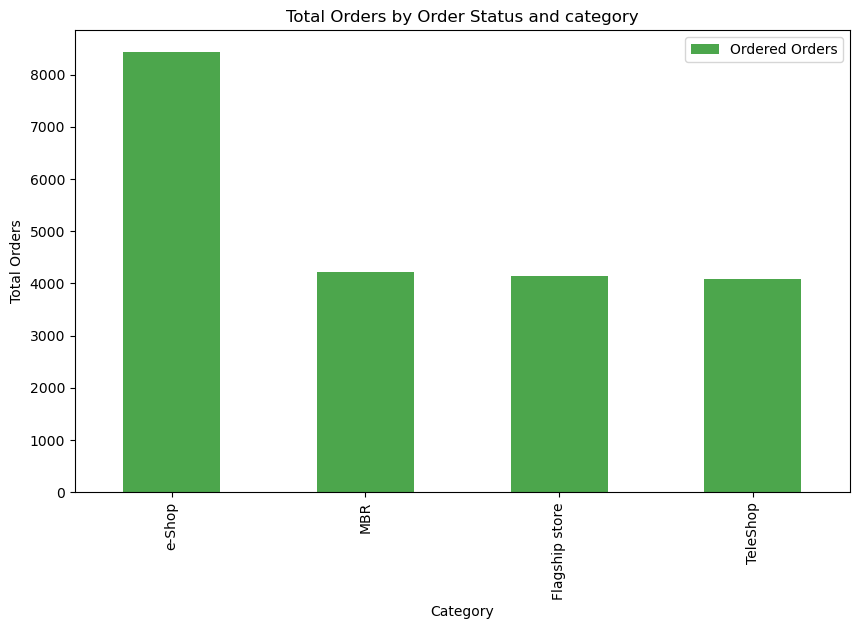

In [41]:
ordered_oc= df[df['order_status'] == 'Ordered']

ordered_store= ordered_oc["store_type"].value_counts()

plt.figure(figsize=(10, 6))
ordered_store.plot(kind="bar", color='green', alpha=0.7, label='Ordered Orders')

plt.xlabel("Category")
plt.ylabel("Total Orders")
plt.title("Total Orders by Order Status and category")
plt.legend()

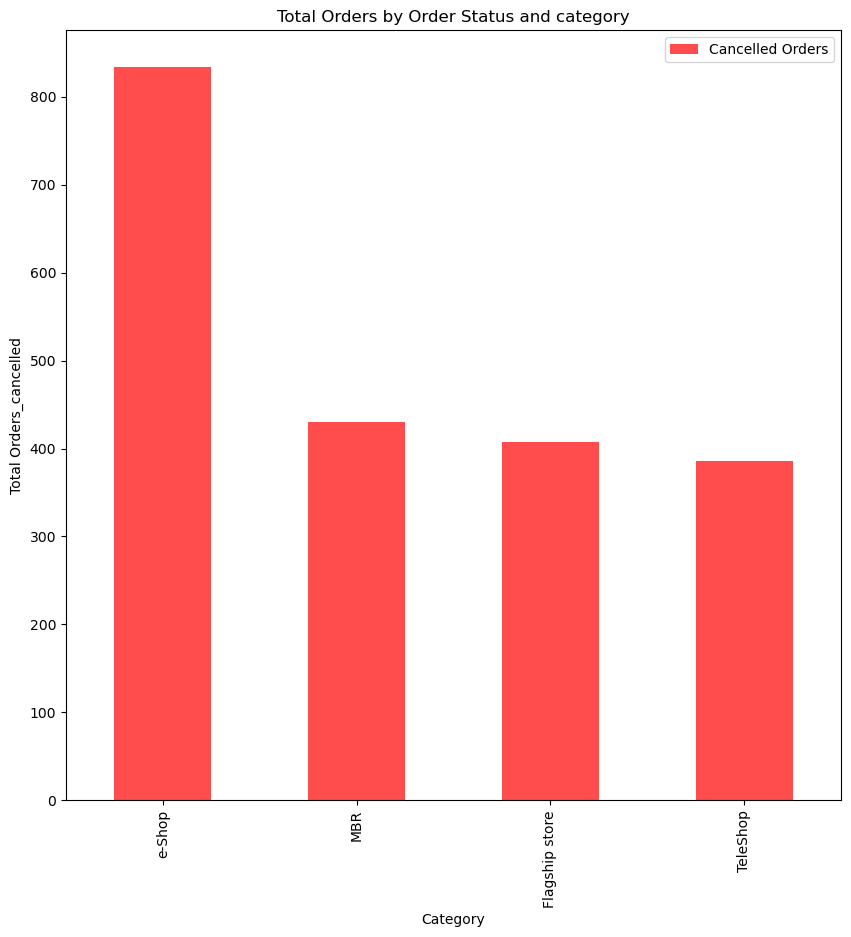

In [42]:
cancelled_oc= df[df['order_status'] == 'Canceled']

cancelled_store = cancelled_oc["store_type"].value_counts()

plt.figure(figsize=(10, 10))
cancelled_store.plot(kind="bar", color='red', alpha=0.7, label='Cancelled Orders')

plt.xlabel("Category")
plt.ylabel("Total Orders_cancelled")
plt.title("Total Orders by Order Status and category")
plt.legend()

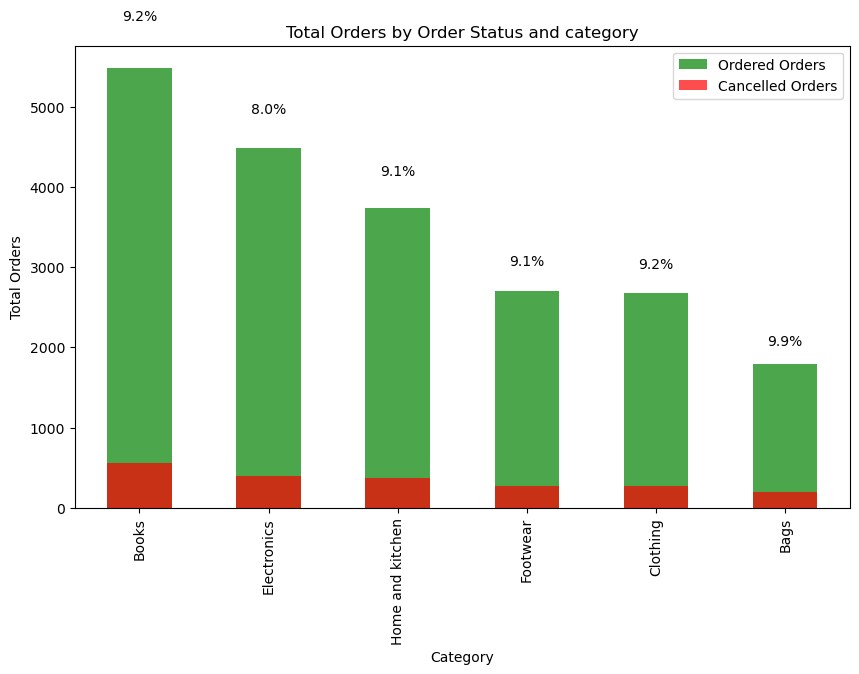

In [55]:
# 전체적인 측면에서 주문과 취소로 나눈 바 그래프
# 도서, 전자제품 순으로 많은 주문이 발생함

ordered_oc= df[df['order_status'] == 'Ordered']
cancelled_oc= df[df['order_status'] == 'Canceled']

# 각 카테고리별 주문된 상품과 취소된 상품의 수 계산
ordered_occ = ordered_oc["prod_cat"].value_counts()
cancelled_occ = cancelled_oc["prod_cat"].value_counts()

# 각 카테고리별 취소율 계산
cancellation_rate = (cancelled_occ / (ordered_occ + cancelled_occ)) * 100

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 카테고리별 주문된 상품과 취소된 상품의 주문 수 바 그래프 그리기
ordered_occ.plot(kind="bar", color='green', alpha=0.7, label='Ordered Orders')
cancelled_occ.plot(kind="bar", color='red', alpha=0.7, label='Cancelled Orders')

plt.xlabel("Category")
plt.ylabel("Total Orders")
plt.title("Total Orders by Order Status and category")
plt.legend()

# 각 카테고리별 취소율을 바 그래프 위에 텍스트로 표시
for i, rate in enumerate(cancellation_rate):
    plt.text(i, ordered_occ[i] + cancelled_occ[i], "{:.1f}%".format(rate), ha='center', va='bottom')

plt.show()

In [56]:
product_by_orders_gender = df.groupby(["day", "prod_cat", "gender"])[["total_amt"]].sum().reset_index()

# 'unknown' 값을 제외한 product_by_orders_gender 데이터프레임 생성
product_by_orders_gender_filtered = product_by_orders_gender[product_by_orders_gender['gender'] != 'unknown']

# pivot_table 생성
pivot_table_gender = product_by_orders_gender_filtered.pivot_table(index='day', columns=["prod_cat", "gender"], values="total_amt")

pivot_table_gender

prod_cat         Bags                   Books                 Clothing  \
gender              F           M           F            M           F   
day                                                                      
Friday     307070.660  294914.555  942392.620   859775.085  469063.660   
Monday     278084.300  305143.540  840433.165   829039.510  396685.055   
Saturday   291335.460  285890.020  829705.825  1095261.635  420799.470   
Sunday     318269.835  252674.825  819843.700  1048884.785  395996.640   
Thursday   330828.160  342989.790  904171.775  1039902.240  400243.155   
Tuesday    305786.650  290681.300  942072.170   878498.205  497994.770   
Wednesday  270608.975  285829.245  931758.100   921835.200  472705.740   

prod_cat              Electronics                Footwear              \
gender              M           F           M           F           M   
day                                                                     
Friday     454570.480  768710.930  826825.090  518845.015  357829.940   
Monday     532168.000  593920.925  759812.365  405369.250  504296.585   
Saturday   403428.870  761151.625  948204.920  429814.060  368702.035   
Sunday     442127.075  753717.185  782384.200  469284.660  517738.910   
Thursday   521514.695  698017.450  815312.095  461689.995  400954.775   
Tuesday    419898.895  770874.520  673571.535  450406.840  394276.155   
Wednesday  472501.315  694846.100  938806.895  491263.110  492954.865   

prod_cat  Home and kitchen              
gender                   F           M  
day                                     
Friday          535613.390  675257.765  
Monday          636791.610  630906.380  
Saturday        599728.805  662109.370  
Sunday          637021.450  635328.590  
Thursday        583933.935  486953.610  
Tuesday         619815.495  653482.635  
Wednesday       543820.225  588966.105

In [57]:
product_by_orders_gender = df.groupby(["day", "prod_cat", "gender"])[["qty"]].sum().reset_index()

# 'unknown' 값을 제외한 product_by_orders_gender 데이터프레임 생성
product_by_orders_gender_filtered = product_by_orders_gender[product_by_orders_gender['gender'] != 'unknown']

# pivot_table 생성
pivot_table_gender = product_by_orders_gender_filtered.pivot_table(index='day', columns=["prod_cat", "gender"], values="qty")

pivot_table_gender

prod_cat  Bags      Books       Clothing      Electronics       Footwear       \
gender       F    M     F     M        F    M           F     M        F    M   
day                                                                             
Friday     310  320  1016  1012      526  548         873   955      581  420   
Monday     346  350   992   997      454  577         747   909      474  578   
Saturday   344  331   960  1153      511  470         868  1047      501  460   
Sunday     336  299  1024  1185      493  512         855   894      546  595   
Thursday   390  405  1033  1118      446  568         806   909      518  492   
Tuesday    357  321  1049  1057      540  530         928   785      513  467   
Wednesday  305  334  1040  1103      479  564         777  1019      618  565   

prod_cat  Home and kitchen       
gender                   F    M  
day                              
Friday                 674  815  
Monday                 750  748  
Saturday               675  738  
Sunday                 747  748  
Thursday               695  625  
Tuesday                710  722  
Wednesday              674  687

In [58]:
# 전체측면에서 대카테고리의 거래금액(주문수량x판매금액+세금)과 주문수량을 나눔
product_order = df.groupby(["day","prod_cat"])[["total_amt","qty"]].sum().reset_index()

# total_amt 열을 천 단위로 구분하고 소수점 아래 한 자리까지 표시
product_order['total_amt'] = product_order['total_amt'].apply(lambda x: '{:,.1f}'.format(x))

product_order

,day,prod_cat,total_amt,qty
0,Friday,Bags,"601,985.2",630
1,Friday,Books,"1,805,555.6",2031
2,Friday,Clothing,"923,634.1",1074
3,Friday,Electronics,"1,595,536.0",1828
4,Friday,Footwear,"876,675.0",1001
5,Friday,Home and kitchen,"1,210,871.2",1489
6,Monday,Bags,"583,227.8",696
7,Monday,Books,"1,669,472.7",1989
8,Monday,Clothing,"929,160.2",1032
9,Monday,Electronics,"1,353,733.3",1656


In [59]:
# 전체측면에서 대카테고리의 거래금액(주문수량x판매금액+세금)과 주문수량을 나눔

product_order = df.groupby(["gender","prod_cat"])[["total_amt","qty"]].sum().reset_index()

# total_amt 열을 천 단위로 구분하고 소수점 아래 한 자리까지 표시
product_order['total_amt'] = product_order['total_amt'].apply(lambda x: '{:,.1f}'.format(x))

product_order

,gender,prod_cat,total_amt,qty
0,F,Bags,"2,101,984.0",2388
1,F,Books,"6,210,377.4",7114
2,F,Clothing,"3,053,488.5",3449
3,F,Electronics,"5,041,238.7",5854
4,F,Footwear,"3,226,672.9",3751
5,F,Home and kitchen,"4,156,724.9",4925
6,M,Bags,"2,058,123.3",2360
7,M,Books,"6,673,196.7",7625
8,M,Clothing,"3,246,209.3",3769
9,M,Electronics,"5,744,917.1",6518


In [60]:
# 전체측면에서 대카테고리 내 세부 카테고리의 거래금액(주문수량x판매금액+세금)과 주문수량을 나눔
product_order = df.groupby(["gender","prod_cat","prod_subcat"])[["total_amt","qty"]].sum().reset_index()

# total_amt 열을 천 단위로 구분하고 소수점 아래 한 자리까지 표시
product_order['total_amt'] = product_order['total_amt'].apply(lambda x: '{:,.1f}'.format(x))

product_order

,gender,prod_cat,prod_subcat,total_amt,qty
0,F,Bags,Mens,"1,072,037.9",1186
1,F,Bags,Women,"1,029,946.2",1202
2,F,Books,Academic,"1,091,104.6",1213
3,F,Books,Children,"1,060,245.3",1190
4,F,Books,Comics,"957,653.8",1127
5,F,Books,DIY,"1,018,821.1",1160
6,F,Books,Fiction,"1,002,512.4",1191
7,F,Books,Non-Fiction,"1,080,040.3",1233
8,F,Clothing,Kids,"1,132,821.7",1270
9,F,Clothing,Mens,"981,853.3",1103


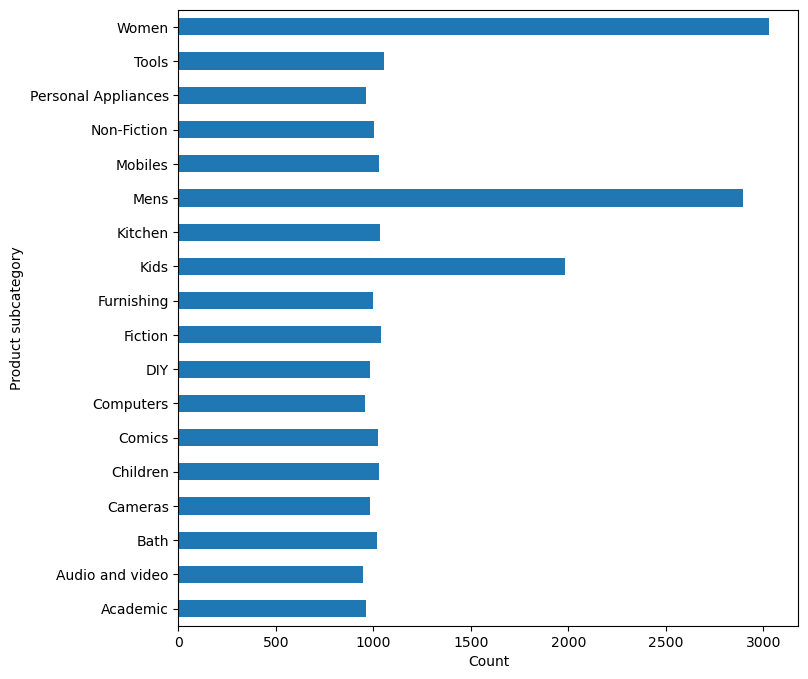

In [61]:
plt.figure(figsize=(8,8))
df.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product subcategory')
plt.show()

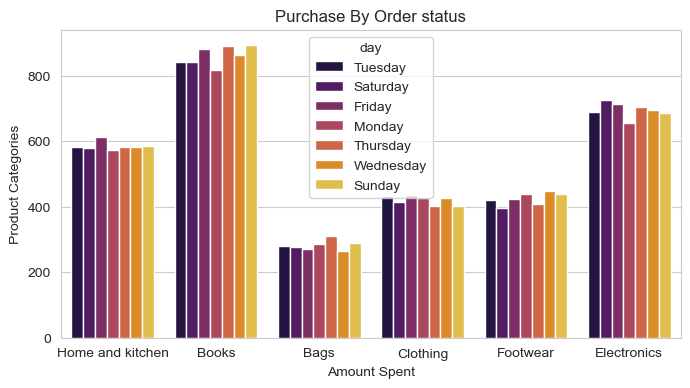

In [62]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x = 'prod_cat', hue = "day", data = df, palette= "inferno")
plt.xlabel('Amount Spent')
plt.ylabel('Product Categories')
plt.title('Purchase By Order status')
plt.show()

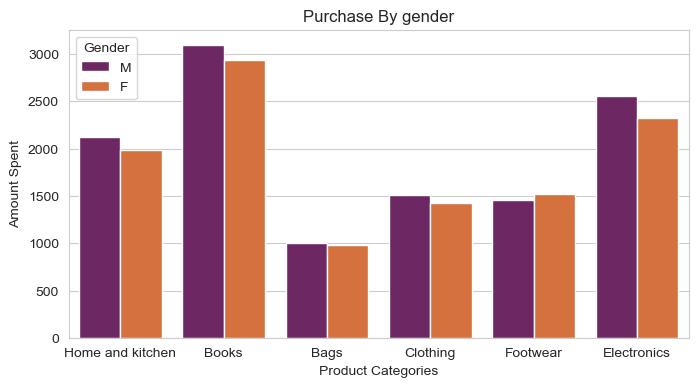

In [63]:
plt.figure(figsize=(8, 4))
sns.set_style('whitegrid')

# 'unknown' 값을 제외한 데이터프레임 생성
df_filtered = df[df['gender'] != 'unknown']

sns.countplot(x='prod_cat', hue='gender', data=df_filtered, palette='inferno')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.title('Purchase By gender')
plt.legend(title='Gender')
plt.show()

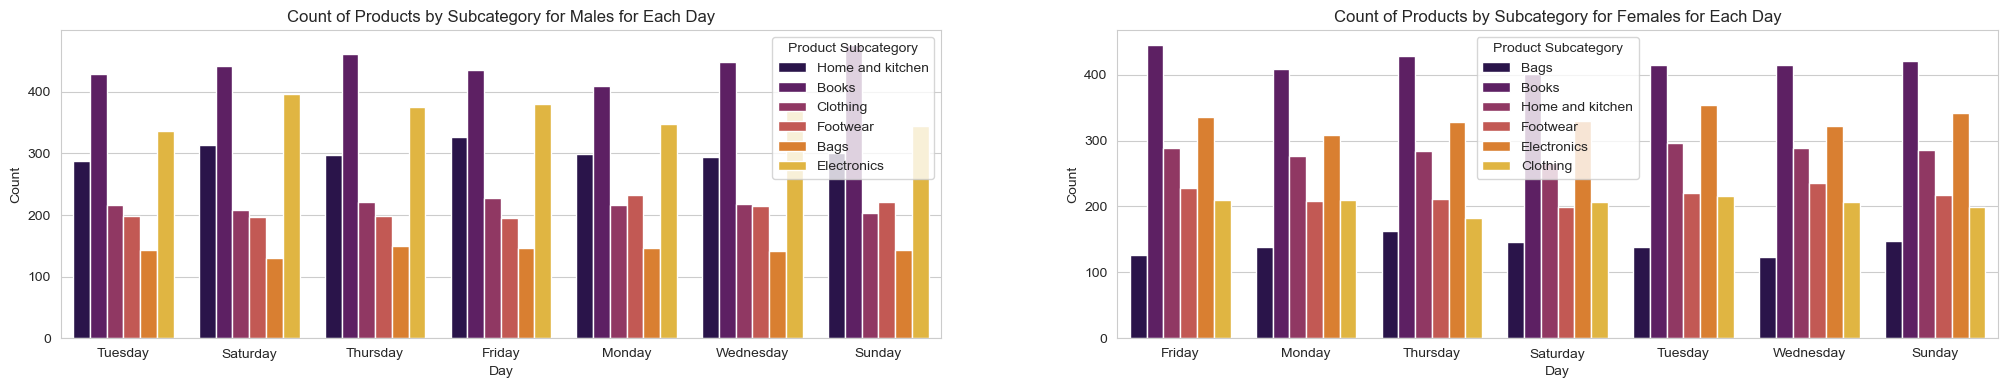

In [64]:
plt.figure(figsize=(25, 4))
sns.set_style('whitegrid')

# 'unknown' 값을 제외한 데이터프레임 생성
df_filtered = df[df['gender'] != 'unknown']

# M과 F에 따라 데이터를 분할하여 그래프 생성
plt.subplot(1, 2, 1)
sns.countplot(x='day', hue='prod_cat', data=df_filtered[df_filtered['gender'] == 'M'], palette='inferno')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Products by Subcategory for Males for Each Day')
plt.legend(title='Product Subcategory')

plt.subplot(1, 2, 2)
sns.countplot(x='day', hue='prod_cat', data=df_filtered[df_filtered['gender'] == 'F'], palette='inferno')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Products by Subcategory for Females for Each Day')
plt.legend(title='Product Subcategory')

plt.show()

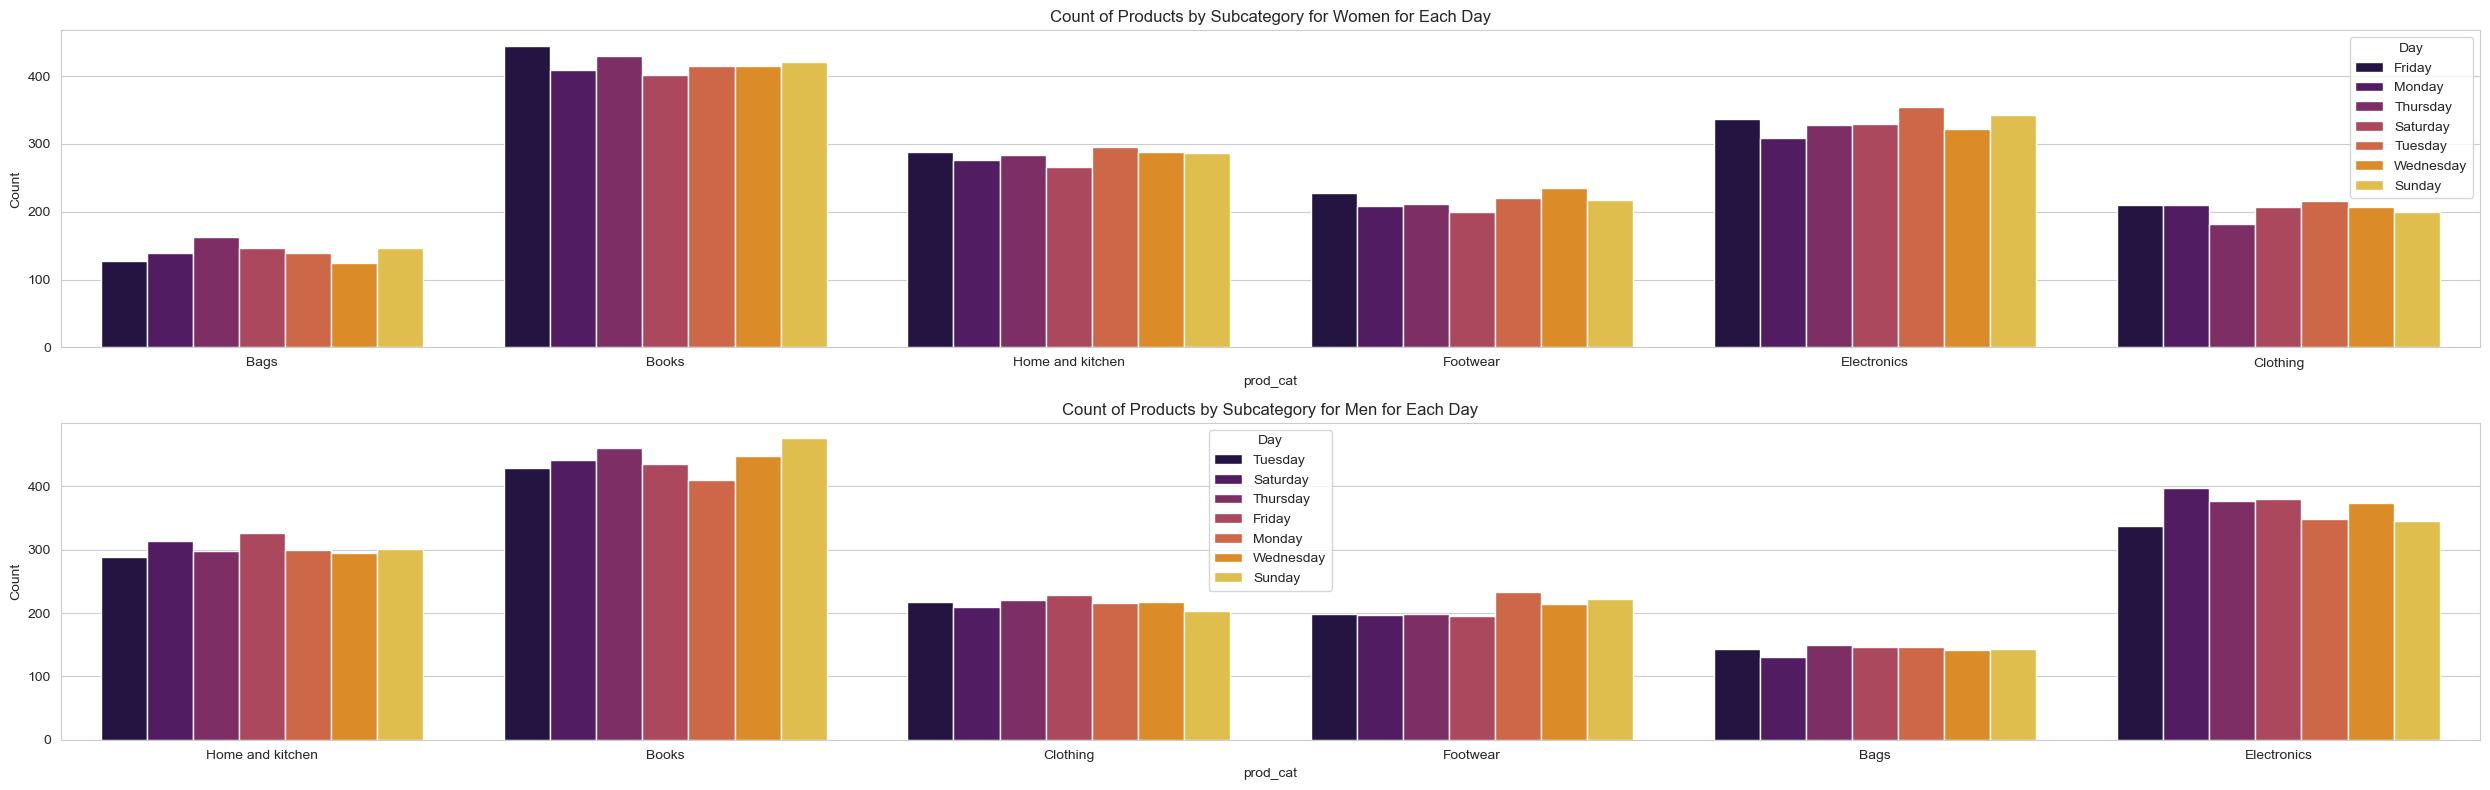

In [65]:
plt.figure(figsize=(25, 8))
sns.set_style('whitegrid')

# 'unknown' 값을 제외한 데이터프레임 생성
df_filtered = df[df['gender'] != 'unknown']

# Females 그래프
plt.subplot(2, 1, 1)
sns.countplot(x='prod_cat', hue='day', data=df_filtered[df_filtered['gender'] == 'F'], palette='inferno')
plt.ylabel('Count')
plt.title('Count of Products by Subcategory for Women for Each Day')
plt.legend(title='Day')

# Males 그래프
plt.subplot(2, 1, 2)
sns.countplot(x='prod_cat', hue='day', data=df_filtered[df_filtered['gender'] == 'M'], palette='inferno')
plt.ylabel('Count')
plt.title('Count of Products by Subcategory for Men for Each Day')
plt.legend(title='Day')

plt.tight_layout()  # 그래프 간 간격 조정

plt.show()

<Figure size 1200x800 with 0 Axes>

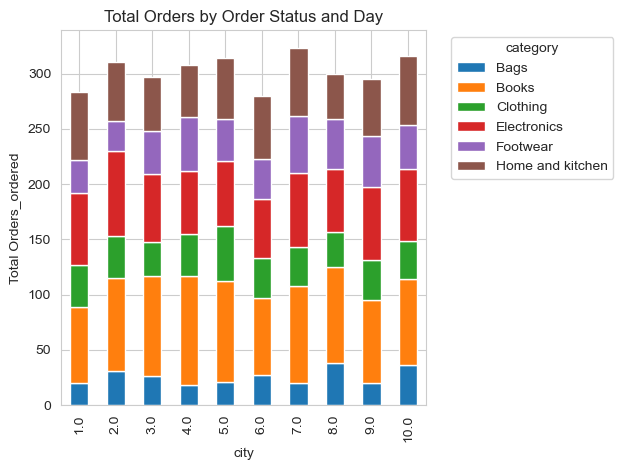

In [66]:
# 도시별로 주문 상태가 '취소'이고 요일이 '일요일'인 주문을 선택합니다.
ordered_orders_dc = df[(df['order_status'] == 'Ordered') & (df['day'] == 'Sunday')]


# 도시별로 개별 변수에 대한 카테고리별 취소된 주문의 총 수를 계산합니다.
ordered_order_counts_dccc = ordered_orders_dc.groupby(['city_code'])['prod_cat'].value_counts()

# 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 8))
ordered_order_counts_dccc.unstack().plot(kind="bar", stacked=True)

plt.xlabel("city")
plt.ylabel("Total Orders_ordered")
plt.title("Total Orders by Order Status and Day")
plt.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

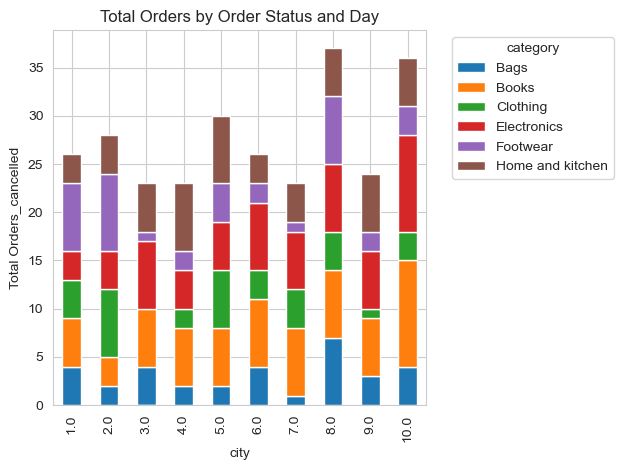

In [67]:
# 도시별로 주문 상태가 '취소'이고 요일이 '일요일'인 주문을 선택합니다.
cancelled_orders_dc = df[(df['order_status'] == 'Canceled') & (df['day'] == 'Sunday')]

# 도시별로 개별 변수에 대한 카테고리별 취소된 주문의 총 수를 계산합니다.
cancelled_order_counts_dccc = cancelled_orders_dc.groupby(['city_code'])['prod_cat'].value_counts()

# 막대 그래프로 시각화합니다.
plt.figure(figsize=(12, 8))
cancelled_order_counts_dccc.unstack().plot(kind="bar", stacked=True)

plt.xlabel("city")
plt.ylabel("Total Orders_cancelled")
plt.title("Total Orders by Order Status and Day")
plt.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

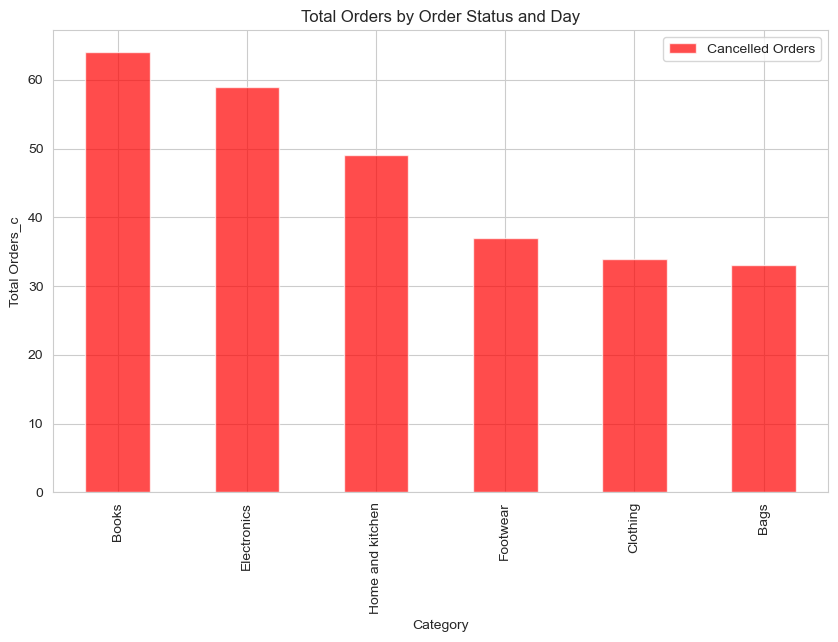

In [68]:
cancelled_orders_dc = df[(df['order_status'] == 'Canceled') & (df['day'] == 'Sunday')]

cancelled_order_counts_city = cancelled_orders_dc["prod_cat"].value_counts()

plt.figure(figsize=(10, 6))
cancelled_order_counts_city.plot(kind="bar", color='red', alpha=0.7, label='Cancelled Orders')

plt.xlabel("Category")
plt.ylabel("Total Orders_c")
plt.title("Total Orders by Order Status and Day")
plt.legend()
plt.show()

In [69]:
# 날짜별, 카테고리별로 매출액과 매출량 합계 계산
df_grouped = df.groupby(['tran_date', 'prod_cat']).agg({'total_amt': 'sum', 'qty': 'sum'}).reset_index()

df_grouped.head()

,tran_date,prod_cat,total_amt,qty
0,2011-01-25,Bags,6395.740,4
1,2011-01-25,Books,18390.515,16
2,2011-01-25,Clothing,1540.370,5
3,2011-01-25,Electronics,6332.755,8
4,2011-01-25,Footwear,7685.275,11


In [71]:
import statsmodels.api as sm

In [79]:
# 각 카테고리별로 회귀분석을 수행하고 결과를 저장
category_summary = {}
for category, data in df.groupby('prod_cat'):
    X = data['qty']
    y = data['total_amt']
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()
    category_summary[category] = model

# 상위 3개의 카테고리 추출
top_categories = df["prod_cat"].value_counts().head(3).index.tolist()

# 각 카테고리별 회귀 분석 결과 출력
for category in top_categories:
    print(f"Category: {category}")
    print(category_summary[category].summary())
    print("\n")

Category: Books
                            OLS Regression Results                            
Dep. Variable:              total_amt   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                 1.041e+04
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:14:45   Log-Likelihood:                -52756.
No. Observations:                6039   AIC:                         1.055e+05
Df Residuals:                    6037   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2995     28.682    

* 주문이 가장 많았던 상위 3개 카테고리(Books, Electronics, Home and kitchen)의 회귀분석 결과

* category: Books
  - R-squared: 0.633
    - 0.633으로 1에 가깝지는 않지만 적절히 모델이 데이터를 잘 설명하고 있음을 알 수 있었음.
  - P-value(qty): 0.000
    - 매출량의 P-value가 매우 작으므로 매출량은 매출액에 유의미한 영향을 미침
  - coef(qty): 883.3482
    - 매출량이 1단위 증가할 때 매출액이 883.3단위로 증가한다는 것을 의미

* category: Electronics
  - R-squared: 0.606
    - 0.606으로 1에 가깝지는 않지만 적절히 모델이 데이터를 잘 설명하고 있음을 알 수 있었음.
  - P-value(qty): 0.000
    - 매출량의 P-value가 매우 작으므로 매출량은 매출액에 유의미한 영향을 미침
  - coef(qty): 885.7429
    - 매출량이 1단위 증가할 때 매출액이 885.7단위로 증가한다는 것을 의미
    
* category: Home and kitchen
  - R-squared: 0.605
    - 0.606으로 1에 가깝지는 않지만 적절히 모델이 데이터를 잘 설명하고 있음을 알 수 있었음.
  - P-value(qty): 0.000
    - 매출량의 P-value가 매우 작으므로 매출량은 매출액에 유의미한 영향을 미침
  - coef(qty): 838.9286
    - 매출량이 1단위 증가할 때 매출액이 838.9단위로 증가한다는 것을 의미

In [80]:
# 각 카테고리별 다중공선성 문제가 있는 지 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 각 카테고리별로 할인액에 대한 VIF 계산
vif_results = {}

for category, data in df_grouped.groupby('prod_cat'):
    X = data['qty']
    X = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_results[category] = vif

# 결과 출력
for category, vif_df in vif_results.items():
    print(f"Category: {category}")
    print(vif_df)
    print("\n")

Category: Bags
  Features       VIF
0    const  2.399243
1      qty  1.000000


Category: Books
  Features       VIF
0    const  3.984135
1      qty  1.000000


Category: Clothing
  Features       VIF
0    const  2.719297
1      qty  1.000000


Category: Electronics
  Features       VIF
0    const  3.568825
1      qty  1.000000


Category: Footwear
  Features       VIF
0    const  2.907523
1      qty  1.000000


Category: Home and kitchen
  Features       VIF
0    const  2.943406
1      qty  1.000000




## **4. 해석 및 검증**


* 우선적으로 연도별, 월별, 요일별로 주문이 되거나 취소되는 현황을 살펴 보았음.
    - 연도별로 비교했을 때 2012, 2013년의 주문이 많이 발생하였으며, 2012년에 주문 취소가 많이 발생하였음. 하지만 연도별로 비교했을 때 주문과 취소 건수가 비슷하여 비교가 어렵다고 판단됨.
    - 월별로는 2월, 1월, 10월 순으로 주문량이 많았으며, 2월, 10월, 4월 순으로 취소가 많이 발생함. 1월에는 오히려 주문취소가 많이 발생하지 않음.
    - 요일별로는 금요일이 가장 많으나 다른 요일도 비슷하게 발생하여 차이를 두기 어려워 보임.
      하지만 취소건수에서 목요일, 금요일 순으로 취소가 발생했고, 일요일이 적었음
* 또한 고객들은 e-shop에서 구매를 많이 하는 경향을 보임


*   대카테고리별 성별 구분했을 때 남성과 여성의 소비 카테고리는 같았지만, bags를 제외하고 다른 항목들에서 남성들의 거래금액과 주문수량이 많았음
*   대카테고리별 요일로 구분했을 때 bags의 경우 남성,여성 모두 목요일, books는 여성은 화요일, 남성은 일요일, clothing은 여성은 화요일, 남성은 월요일, electronics는 여성의 경우 화요일, 남성은 토요일, footwear은 여성은 수요일, 남성은 일요일, home and kitchen의 경우 여성은 월요일, 남성은 금요일이 구매량이 많았음
  * 여성
       - bags : 목요일
       - home and kitchen : 월요일
       - clothing, electronics, books : 화요일
       - footwear: 수요일
  * 남성
       - bags : 목요일
       - books : 일요일
       - clothing : 월요일
       - electronics : 토요일
       - footwear : 일요일
       - home and kitchen : 금요일

*  세부적인 카테고리 분석은 거래금액이나 수량이 비슷했음





* 성별 구분 없음
  - 요일별로 대카테고리르 나누어봤을 때 전체적으로는 books가 많이 주문되었음
  - 카테고리 측면에서 보면 home and kitchen은 금요일, books는 일요일, bags는 목요일, clothing은 화요일, footwear은 수요일, electronics는 토요일에 구매가 많았음.
  - 하지만 월요일은 특이사항이 없어 books 주문이 많은 것으로 봐야함



*   각 도시별 대카테고리 주문량을 분석했을 때 다음과 같은 항목들이 각 도시에서 많이 주문되었음
  - 1번, 3번 도시: home and kitchen
  - 2번, 8번 도시: electronics
  - 4번, 7번 도시: books
  - 5번, 10번 도시: bags
  - 6번 도시: clothing
  - 9번 도시: footwear

## **5. 결론**

* 대카테고리와 서브카테고리를 비교했을 때 서브카테고리에서는 매출액 등 구분이 어렵다고 판단하여 대카테고리를 기준으로 매출 성장 방안을 마련

* 도시별 상품소비 특성을 고려해 접근 필요
  - 도시를 기준으로 매출 성장을 시키기 위해 일요일과 월요일은 books, 화요일은 clothing, 수요일은 footwear, 목요일은 bags, 금요일은 home and kitchen, 토요일은 electronics 라는 각각의 대카테고리별 구매향상을 위한 전략을 세워야 함.
  - 위의 요일들을 기반으로 10개 도시별로 주문이 많았던 카테고리들을 고려해 도시별로 해당 카테고리 품목을 싸게 판매하거나 할인 쿠폰 배부 등 다른 전략이 필요

* 목요일이 가장 상품 주문취소 건수가 많았던 이유는 주로 남성 여성 모두 목요일은 bags를 구매를 하는 경향이 있는데, 가방의 경우 주문취소에 대한 부담이 덜하기 때문에 취소가 많다고 봄. 특히 여성이 남성보다 가방을 구매하는 양과 금액이 큰 것으로 나타나, 사람들의 소비가 많고 취소가 적은 1월에 큰 판매 이벤트를 열어 여성들이 많이 가방을 많이 구매할 수 있도록 유도 필요
